In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns

In [7]:
df = pd.read_csv('sentiments.csv')
df_topics = pd.read_csv('topics-quantified_revised24.csv', header=0, index_col=0)
df.head()

,Unnamed: 0,Unnamed: 0.1,aid,paper,author,date,url,sent,p_pos,p_neg
0,0,0,wsj0,wsj,"['Natalie Andrews', 'Louise Radnofsky', 'Krist...",NaN,https://www.wsj.com/articles/trump-calls-meeti...,pos,0.642044,0.357956
1,1,1,wsj1,wsj,"['Sarah Krouse', 'Sarah.Krouse Wsj.Com']",NaN,https://www.wsj.com/articles/blackrock-goes-pu...,pos,0.508808,0.491192
2,2,2,wsj2,wsj,"['Sarah Nassauer', 'Sarah.Nassauer Wsj.Com']",NaN,https://www.wsj.com/articles/gun-makers-strate...,pos,0.650000,0.350000
3,3,3,wsj3,wsj,[],NaN,http://www.wsj.com/video/how-student-survivors...,pos,0.976332,0.023668
4,4,4,wsj4,wsj,"['Heather Haddon', 'Google', 'Heather.Haddon W...",NaN,https://www.wsj.com/articles/kroger-to-stop-se...,pos,0.739436,0.260564


In [8]:
df=df.drop('Unnamed: 0.1', axis=1)
grp=df.groupby('paper').mean()
grp['sentdiff']=grp['p_pos']-grp['p_neg']
papers = set(df['paper'])

In [9]:
grp

,Unnamed: 0,p_pos,p_neg,sentdiff
paper,,,,
blaze,1945.666667,0.676215,0.323785,0.352429
breitbart,2420.166667,0.673804,0.326196,0.347609
fox,2270.166667,0.633744,0.366256,0.267487
huffpo,2567.166667,0.672732,0.327268,0.345463
inforwars,2767.500000,0.662066,0.337934,0.324132
msnbc,1777.666667,0.707671,0.292329,0.415343
nation,2677.166667,0.354428,0.645572,-0.291145
npr,1627.666667,0.699635,0.300365,0.399270
nyt,2111.666667,0.704217,0.295783,0.408434


[Text(0,0,'huffpo'),
 Text(0,0,'nation'),
 Text(0,0,'wsj'),
 Text(0,0,'breitbart'),
 Text(0,0,'inforwars'),
 Text(0,0,'blaze'),
 Text(0,0,'npr'),
 Text(0,0,'fox'),
 Text(0,0,'msnbc'),
 Text(0,0,'nyt')]

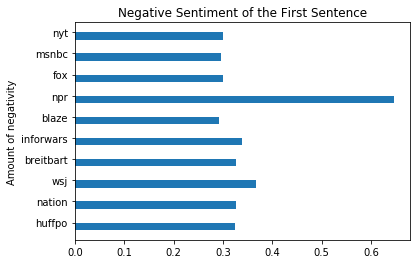

In [10]:
ind = np.arange(len(grp['p_neg']))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.barh(ind - width/2, grp['p_neg'], width)

ax.set_ylabel('Amount of negativity')
ax.set_title('Negative Sentiment of the First Sentence')
ax.set_yticks(ind)
ax.set_yticklabels(papers)


In [ ]:
foxs=df[df['paper']=='fox']
huffpos = df[df['paper']=='huffpo']

In [ ]:
huffpos.plot.line(x=huffpos.date, y='p_neg', figsize=(12,3))

In [ ]:
nprs=df[df['paper']=='npr']
nprs.head()

In [ ]:
nprs.plot.line(x=nprs.date, y='p_pos', figsize=(12,3))

In [ ]:
fox_pos=df[(df['paper']=='fox') & (df['p_pos']>.75)]

In [ ]:
df_content = pd.read_csv('cleandataset.csv', header=0, index_col=0)
df_content.head()

In [ ]:
df_content_fox = df_content[df_content['paper']=='fox']
df_content_fox.head()

In [ ]:
#join this dataset on the aid, but from df_content_fox, only keep content & clean content